! git clone https://github.com/DS3001/assignment4# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

In [2]:
! git clone https://github.com/DS3001/assignment4

fatal: destination path 'assignment4' already exists and is not an empty directory.


In [27]:
# load packages 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import tree 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

#Question 1 part 1:load data
cars = pd.read_csv('./assignment4/data/cars_hw.csv', low_memory=False)
print(cars.shape)
print(cars.dtypes)
print(cars.head())
#Clean data
cars.isnull().sum()
def windsorize(x):
    # Compute IQR and 1st,3rd quantiles
    pct25, pct75 = np.percentile(x,[25,75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    # Windsorize x:
    x_windsor = x
    x_windsor[ x < lower_whisker ] = lower_whisker
    x_windsor[ x > upper_whisker ] = upper_whisker
    return(x_windsor)
numeric= ["Mileage_Run", "Seating_Capacity", "Price"]
for i in numeric: 
    windsorize (cars[i])
cars.dropna()
cars['Price'] = np.arcsinh(cars['Price'])
cars['No_of_Owners']=cars['No_of_Owners'].apply(lambda x:int(x[0]))**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv 
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

(976, 12)
Unnamed: 0            int64
Make                 object
Make_Year             int64
Color                object
Body_Type            object
Mileage_Run           int64
No_of_Owners         object
Seating_Capacity      int64
Fuel_Type            object
Transmission         object
Transmission_Type    object
Price                 int64
dtype: object
   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Spe

<ipython-input-21-095ca4b1e871>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[ x < lower_whisker ] = lower_whisker
<ipython-input-21-095ca4b1e871>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[ x > upper_whisker ] = upper_whisker
<ipython-input-21-095ca4b1e871>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[ x < lower_whisker ] = lower_whisker
<ipython-input-21-095ca4b1e871>:15: SettingWithCopyW

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1,5,diesel,7-Speed,Automatic,14.088586
1,2,Hyundai,2016,red,crossover,20305,1,5,petrol,5-Speed,Manual,14.125932
2,3,Honda,2019,white,suv,29540,2,5,petrol,5-Speed,Manual,14.276726
3,4,Renault,2017,bronze,hatchback,35680,1,5,petrol,5-Speed,Manual,13.626768
4,5,Hyundai,2017,orange,hatchback,25126,1,5,petrol,5-Speed,Manual,13.845069


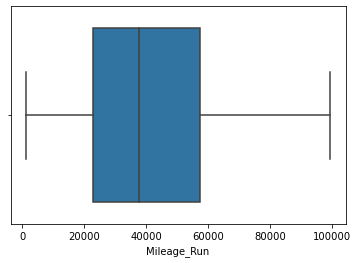

In [21]:
#1.1
#load data
cars = pd.read_csv('./assignment4/data/cars_hw.csv', low_memory=False)
print(cars.shape)
print(cars.dtypes)
print(cars.head())
#Clean data
cars.isnull().sum()
def windsorize(x):
    pct25, pct75 = np.percentile(x,[25,75])
    iqr = pct75 - pct25
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    x_windsor = x
    x_windsor[ x < lower_whisker ] = lower_whisker
    x_windsor[ x > upper_whisker ] = upper_whisker
    return(x_windsor)
numeric= ["Mileage_Run", "Seating_Capacity", "Price"]
for i in numeric: 
    windsorize (cars[i])
cars.dropna()
cars['Price'] = np.arcsinh(cars['Price'])
cars['No_of_Owners']=cars['No_of_Owners'].apply(lambda x:int(x[0]))
sns.boxplot(cars['Mileage_Run'])  
cars.head()

count    976.000000
mean      14.093103
std        0.426491
min       12.837344
25%       13.765795
50%       14.102942
75%       14.384228
max       14.910031
Name: Price, dtype: float64


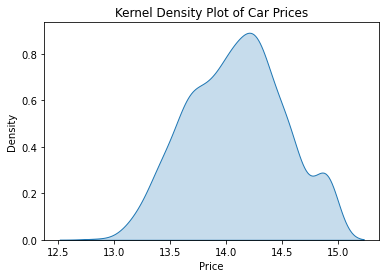

               count       mean           std        min        25%  \
Make                                                                  
Chevrolet        6.0  13.613042  4.809748e-01  13.188151  13.261539   
Datsun           3.0  13.269194  3.631144e-02  13.232114  13.251449   
Ford            52.0  14.161427  2.108945e-01  13.270783  14.054527   
Honda           73.0  14.229075  3.361553e-01  13.356645  13.965653   
Hyundai        305.0  14.061154  3.976065e-01  13.114331  13.785051   
Jeep             4.0  14.873348  7.336560e-02  14.763300  14.873348   
Kia              8.0  14.899120  3.086269e-02  14.822738  14.910031   
MG Motors       35.0  14.910031  7.209162e-15  14.910031  14.910031   
Mahindra        18.0  14.592100  1.599060e-01  14.280502  14.544955   
Maruti Suzuki  293.0  13.911280  3.714089e-01  13.068963  13.619496   
Nissan           4.0  14.334341  3.926098e-01  13.764217  14.230922   
Renault         68.0  14.044009  3.317174e-01  13.260385  13.764211   
Skoda 

/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Density')

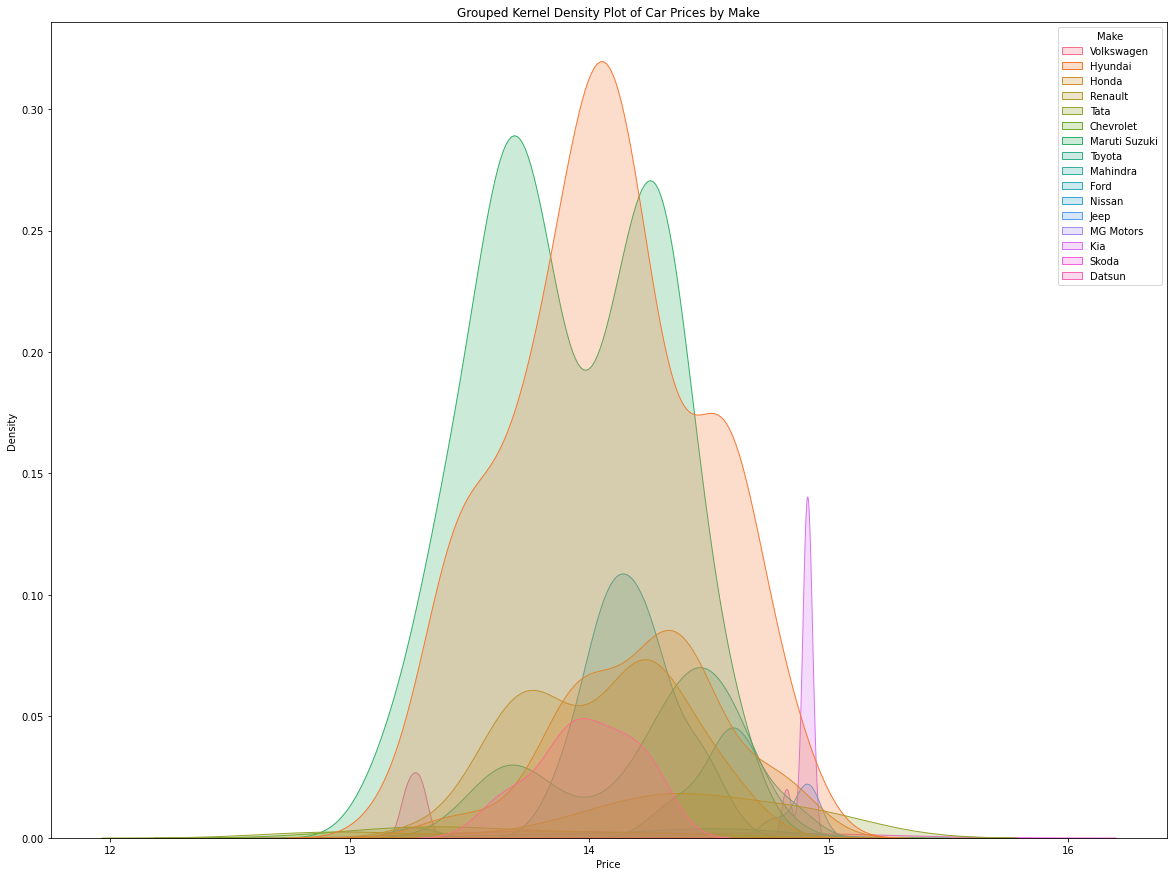

In [23]:
1.2 
price_summary=cars['Price'].describe()
print(price_summary)
sns.kdeplot(data=cars['Price'], shade=True)
plt.title('Kernel Density Plot of Car Prices')
plt.xlabel('Price')
plt.show()
brand_price_summary = cars.groupby('Make')['Price'].describe()
print(brand_price_summary)


plt.figure(figsize=(20, 15))  
sns.kdeplot(data=cars, x='Price', hue='Make', shade=True) 
plt.title('Grouped Kernel Density Plot of Car Prices by Make')
plt.xlabel('Price')
plt.ylabel('Density')

# Which car brands are the most expensive?
# MG Motors (because the mean price is 14.910031 and there is zero standard deviation meaning all cars from this brand are around this price), Kia (because the mean price is 14.899120 standard deviation is very low meaning most of the cars have that price).
# What do prices look like in general?
# There is not to much variance in the prices the overall mean price across all brands is 14.093103,the standard deviation of 0.426491 suggests moderate variation in prices across the dataset, and the minimum price in the dataset is 12.837344, while the maximum price is 14.910031.


In [9]:
# 1.3
y = cars['Price']
X = cars.drop('Price',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train, X_test, y_train, y_test )

     Unnamed: 0           Make  Make_Year   Color  Body_Type  Mileage_Run  \
679         680        Renault       2018    grey        suv        18005   
625         626  Maruti Suzuki       2013   white  hatchback        47642   
33           34        Hyundai       2021     red  hatchback        13389   
31           32          Honda       2013   white      sedan        10651   
883         884        Hyundai       2017     red      sedan        36208   
..          ...            ...        ...     ...        ...          ...   
106         107     Volkswagen       2014  silver      sedan        68269   
270         271        Hyundai       2021    grey  hatchback        27185   
860         861        Hyundai       2020     red        suv        12699   
435         436  Maruti Suzuki       2017    grey  hatchback        84623   
102         103  Maruti Suzuki       2017    blue      sedan        36922   

     No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Typ

In [20]:
#1.4

numerical_cols = ['Mileage_Run', 'Seating_Capacity', 'No_of_Owners','Make_Year']
categorical_cols = ['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission', 'Transmission_Type']

# Model 1
X_numeric = cars[numerical_cols]
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_numeric, y, test_size=0.2, random_state=42)
df = LinearRegression()
df.fit(X_train_df, y_train_df)
y_pred_df = df.predict(X_test_df)
r2_df = r2_score(y_test_df, y_pred_df)
rmse_df = mean_squared_error(y_test_df, y_pred_df, squared=False)

# Model 2
X_categorical = pd.get_dummies(cars[categorical_cols])
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_categorical, y, test_size=0.2, random_state=42)
tf = LinearRegression()
tf.fit(X_train_tf, y_train_tf)
y_pred_tf = tf.predict(X_test_tf)
r2_tf = r2_score(y_test_tf, y_pred_tf)
rmse_tf = mean_squared_error(y_test_tf, y_pred_tf, squared=False)

# Model 3
X_combined = pd.concat([X_numeric, X_categorical], axis=1)
X_train_kf, X_test_kf, y_train_kf, y_test_kf = train_test_split(X_combined, y, test_size=0.2, random_state=42)
kf = LinearRegression()
kf.fit(X_train_kf, y_train_kf)
y_pred_kf = kf.predict(X_test_kf)
r2_kf = r2_score(y_test_kf, y_pred_kf)
rmse_kf = mean_squared_error(y_test_kf, y_pred_kf, squared=False)

(r2_df, rmse_df), (r2_tf, rmse_tf), (r2_kf, rmse_kf)


# Model 1: what is the  𝑅2 and RMSE on the test set?
# For Model 1 the R2 is 0.3803046467317839 and the RMSE is 0.3291937750663589
# Model 2: what is the  𝑅2  and RMSE on the test set? 
# For Model 1 the R2 is 0.638058350119419 and the RMSE is 0.25158328024095833
# Which model performs better on the test set? 
# Model 2 performs the best it has the higest R2 and the lowest RMSE compared to Model 1
# Model 3: what is the  𝑅2 and RMSE on the test set? 
# For Model 1 the R2 is 0.7938789005435803 and the RMSE is 0.1898557346257856
# Does the joint model perform better or worse, and by home much?
# Model 3, performs the best the improvement in R² from Model 1 to Model 3 is 0.7939 - 0.3803 = 0.4136, and the improvement in RMSE is 0.3292 - 0.1899 = 0.1393.The improvement in R² from Model 2 to Model 3 is 0.7939 - 0.6381 = 0.1558, and the improvement in RMSE is 0.2516 - 0.1899 = 0.0617. Model 3 has the highest R², indicating it explains the most variance, and the lowest RMSE, indicating the highest accuracy in predictions.


((0.3803046467317839, 0.3291937750663589),
 (0.638058350119419, 0.25158328024095833),
 (0.7938789005435803, 0.1898557346257856))

In [11]:
#1.5 


X = cars.drop(["Price", "Make", "Color", "Body_Type", "Fuel_Type", "Transmission", "Transmission_Type"], axis=1)
y = cars['Price']

for i in range(1, 20):
    expander = PolynomialFeatures(degree=i, include_bias=False)
    Z = expander.fit_transform(X)
    names = expander.get_feature_names(X.columns)  
    zdf = pd.DataFrame(Z, columns=names)

    X_train, X_test, y_train, y_test = train_test_split(zdf, y, test_size=0.2, random_state=100)

    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    print(f'Degree: {i}, R^2: {r2}, RMSE: {rmse}')

#A s you increase the degree of the expansion, how do the  𝑅2and RMSE change?
# As the degree of the polynomial features increases from 1 to 3, both the R² and RMSE improve. This indicates that the model is better fitting the data up to degree 3. Specifically, R² increases (indicating better model fit) and RMSE decreases (indicating lower prediction error) as you move from degree 1 to 3.
# At what point does  𝑅2go negative on the test set? 
# Starting at degree 4, the R² value becomes negative. A negative R² indicates that the model is performing worse than a simple horizontal line mean model. Aka indicates overfitting, where the model is too complex and is capturing the noise in the training data rather than the underlying pattern.
# For your best model with expanded features, what is the  𝑅2and RMSE? How does it compare to your best model from part 3?
# The best model with expanded features (degree 3) has an R² of 0.4644 and an RMSE of 0.3054. In comparison, model from part 3 (R² = 0.7891 and RMSE = 0.1920) performed significantly better. This suggests that the additional complexity added by higher-degree polynomial features does not contribute positively to the model's predictive capability, peoverfitting.   




Degree: 1, R^2: 0.42990384406159476, RMSE: 0.31504541513492434
Degree: 2, R^2: 0.4472809512800434, RMSE: 0.3102068069957626
Degree: 3, R^2: 0.4644206955554787, RMSE: 0.3053591941483246
Degree: 4, R^2: -3.174839257413227, RMSE: 0.8525482881226045
Degree: 5, R^2: -0.4075547305470235, RMSE: 0.49503026640237585
Degree: 6, R^2: -2.9032525419159585, RMSE: 0.8243515008696383
Degree: 7, R^2: -2.833391792944091, RMSE: 0.8169410359208358
Degree: 8, R^2: -0.977939847820908, RMSE: 0.5868210002683975
Degree: 9, R^2: -2.0046225251553835, RMSE: 0.7232593666824272
Degree: 10, R^2: -0.015652431004689937, RMSE: 0.4205054835694505
Degree: 11, R^2: -0.062472475174774056, RMSE: 0.4300886198906978
Degree: 12, R^2: -0.14200770175435373, RMSE: 0.44589604861207127
Degree: 13, R^2: -0.06207696098590376, RMSE: 0.43000856041178565
Degree: 14, R^2: -1.9822626164720067, RMSE: 0.7205631522490793
Degree: 15, R^2: -2.1372124283410483, RMSE: 0.7390453193589106
Degree: 16, R^2: -1.977660649545919, RMSE: 0.72000698257982

/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


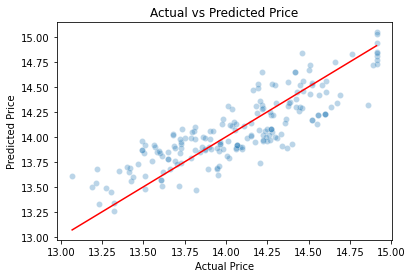

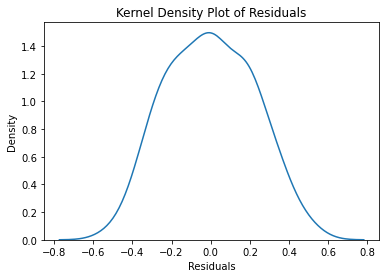

In [14]:
#Determine the predicted values for the test data and plot them against the true values
sns.scatterplot(y_test_kf, y_pred_kf, alpha=0.3)
plt.plot([y_test_kf.min(), y_test_kf.max()], [y_test_kf.min(), y_test_kf.max()], 'r')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')

plt.show()

# Compute the residuals/errors for the test data and create a kernel density plot
residuals = y_test_kf - y_pred_kf
sns.kdeplot(residuals)
plt.title('Kernel Density Plot of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')

plt.show()

# Do the predicted values and true values roughly line up along the diagonal, or not?
# Based on the scatterplot the predicted values and true values roughly line up along the diagonal(aka the distance from the datapoints from the line is not far)(aka predicted prices being close to the actual prices in most cases). 

#Do the residuals look roughly bell-shaped around zero? 
# The residuals look roughly bell-shaped around zero (aka the model does not overpredict or underpredict the actual price values)

#Evaluate the strengths and weaknesses of your model.
#The close alignment in the scatterplot implies that the model can accurately predict car prices. The bell-shaped distribution of residuals around zero suggests that the model's errors are random and normally distributed. The weakness is that because the model involves polynomial expansion, there's a risk of overfitting, particularly if higher-degree polynomials were used.


In [15]:
#1.7 

depths = range(1, 20)
r2_tree_scores = []
rmse_tree_scores = []

for depth in depths:
    
    # Construct an appropriate matrix of regressors/features, and fit a tree to the data. 
    model_tree = tree.DecisionTreeRegressor(max_depth=depth)
    cart = model_tree.fit(X_train_kf, y_train_kf)
   
    #tree.plot_tree(cart,filled=True) 
    #plt.show()

   
    # Predict and evaluate the model compute the  𝑅2and RMSE on the test set of a variety of depths
    y_pred_tree = model_tree.predict(X_test_kf)
    r2_tree = r2_score(y_test_kf, y_pred_tree)
    rmse_tree = mean_squared_error(y_test_kf, y_pred_tree, squared=False)
    r2_tree_scores.append(r2_tree)
    rmse_tree_scores.append(rmse_tree)

    
for i, depth in enumerate(depths):
    print(f"Depth: {depth}, R^2: {r2_tree_scores[i]}, RMSE: {rmse_tree_scores[i]}")

    
# What depth tree gives the best results?   
# The best depth for the regression tree appears to be 9, where the R² is the highest at 0.72 and the RMSE is the lowest at 0.21. This indicates that the tree with a maximum depth of 9 provides the best balance between fitting the training data and generalizing to the test data going beyound that depth would be overfitting the data.  

Depth: 1, R^2: 0.37549083922104987, RMSE: 0.3304698939729935
Depth: 2, R^2: 0.4800443690818794, RMSE: 0.3015404907853076
Depth: 3, R^2: 0.5375042771699309, RMSE: 0.28439133165279845
Depth: 4, R^2: 0.6020431838991327, RMSE: 0.26380344837464675
Depth: 5, R^2: 0.6656857405016552, RMSE: 0.24179089616737712
Depth: 6, R^2: 0.6979984005651985, RMSE: 0.22980904393244153
Depth: 7, R^2: 0.7408070852635003, RMSE: 0.21289921358051692
Depth: 8, R^2: 0.7183700296218101, RMSE: 0.22192280303383752
Depth: 9, R^2: 0.7265914168447964, RMSE: 0.21865960871133674
Depth: 10, R^2: 0.6851881988939115, RMSE: 0.23463240731863824
Depth: 11, R^2: 0.6583594736441817, RMSE: 0.24442587896371828
Depth: 12, R^2: 0.6652426663914801, RMSE: 0.24195106853627757
Depth: 13, R^2: 0.6621109578535171, RMSE: 0.24308017945314914
Depth: 14, R^2: 0.6728096767602629, RMSE: 0.2392008506925088
Depth: 15, R^2: 0.6754057664751598, RMSE: 0.2382499919117076
Depth: 16, R^2: 0.6479416013887098, RMSE: 0.24812461431647553
Depth: 17, R^2: 0.65

/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


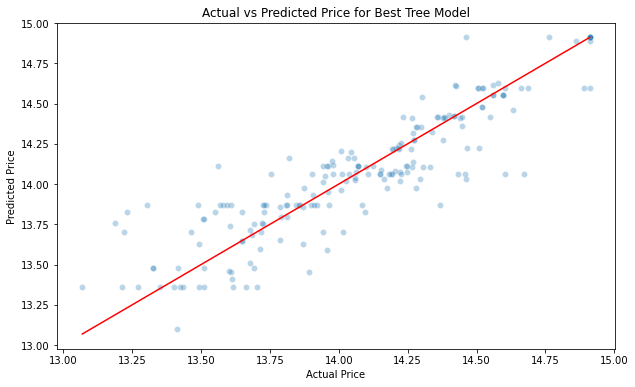

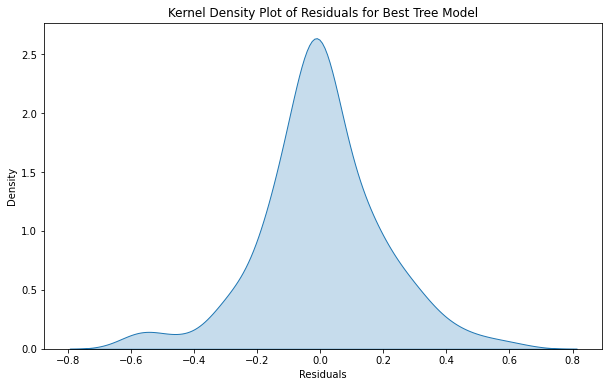

In [26]:
#1.8 

# Best tree model with depth 9
best_tree_model = tree.DecisionTreeRegressor(max_depth=9)
best_tree_model.fit(X_train_kf, y_train_kf)
y_pred_best_tree = best_tree_model.predict(X_test_kf)

# Plot against the true values
plt.figure(figsize=(10, 6))
sns.scatterplot(y_test_kf, y_pred_best_tree, alpha=0.3)
plt.plot([y_test_kf.min(), y_test_kf.max()], [y_test_kf.min(), y_test_kf.max()], 'r')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price for Best Tree Model')
plt.show()

# Compute the residuals/errors for the test data and create a kernel density plot. 
residuals_best_tree = y_test_kf - y_pred_best_tree
plt.figure(figsize=(10, 6))
sns.kdeplot(residuals_best_tree, shade=True)
plt.title('Kernel Density Plot of Residuals for Best Tree Model')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

# Do the predicted values and true values line up along the diagonal, or not? 
# The predicted values and true values line up some what along the diagonal there is some distance from the point and the line.
# Do the residuals look roughly bell-shaped around zero?
# The residuals look roughly bell-shaped around zero with a little inconsistency around -.6.


In [ ]:
#1.9 Which model --- linear model or classification and regression tree --- has better performance on the test set?
# The linear model perfroms the best it has the higher R² (0.7939) compared to the CART model (0.7266) and the lower RMSE (0.1899) compared to the CART model (0.2187). This indicates the linear model has lower prediction errors. Which indicates that the linear model not only explains a higher proportion of the variance in car prices but also has lower prediction errors (aka is better).

**Q2.** The is a question about regression using decision trees and linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work

  1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.
  2. Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set? 
  3. Make a scatterplot of `avg_salary` and `Rating`. Is there an obvious visual relationship between the two variables? Regress `avg_salary` on `Rating` as a numeric variable: Do higher ratings predict higher or lower wages? Convert `Rating` to a one-hot encoded variable, with a category for each rating. Run a regression of `avg_salary` on the categorical version. How do your results change? Explain. Which version has a higher $R^2$ and lower `RMSE`?
  4. Now interact `Sector` with the categorical version of `Rating`, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the `.PolynomialFeatures()` function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts `Sector` and `Rating` and then one-hot encoding the result. Regress `avg_salary` on the (Sector, Rating) pairs. How does the $R^2$ and `RMSE` on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?
  5. Run a linear regression of `avg_salary` on all the variables. What is the $R^2$ on the test set? How does it compare to your simpler models in 2--4? 
  6. Build a decision tree by regressing `avg_salary` on `Sector`, `Rating`, and the (Sector, Rating) pairs. What are the $R^2$ and `RMSE` of your models on the test set? How do your answers compare to parts 2, 3, and 4?
  7. Build a decision tree by regressing `avg_salary` on all the other variables. What is the $R^2$ and `RMSE` on the test set?
  8. Build a linear regression or decision tree using the available variables based on your own judgment. What degrees of freedom are you giving the model to predict variation in wages across company and location attributes? What is the $R^2$ and `RMSE` of your model? How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high 
    - Husband's education (categorical) 1=low, 2, 3, 4=high 
    - Number of children ever born (numerical) 
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?
  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.
  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?
  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

In [28]:
3.1
# load data
data_path = './assignment4/data/contraception_hw.csv'
contraception_data = pd.read_csv(data_path)
print(contraception_data.head())
contraception_data.drop(columns=['Unnamed: 0'], inplace=True)

# Tabulate the 'method' variable
method_counts = contraception_data['method'].value_counts()

# Cross tabulate 'method' and 'numberChildren'
pd.crosstab(contraception_data['method'], contraception_data['numberChildren'])

# Do couples that use birth control tend to have more children than those who don't?Do couples that use birth control tend to have more children than those who don't?
# Families that use birth control tend to have less childern which is specifically inidicated when couples have eight childern and above. 

   Unnamed: 0  age  edu  edu_spouse  numberChildren  religion  working  \
0           1   24    2           3               3         1        1   
1           2   45    1           3              10         1        1   
2           3   43    2           3               7         1        1   
3           4   42    3           2               9         1        1   
4           5   36    3           3               8         1        1   

   spouse_occupation  standardOfLivingIndex  mediaExposure  method  
0                  2                      3              0       1  
1                  3                      4              0       1  
2                  3                      4              0       1  
3                  3                      3              0       1  
4                  3                      2              0       1  


numberChildren,0,1,2,3,4,5,6,7,8,9,10,11,12,13,16
method,,,,,,,,,,,,,,,
1,95,143,114,70,57,44,35,18,29,5,9,6,4,0,0
2,0,46,56,70,62,36,27,19,9,3,2,2,0,1,0
3,2,87,106,119,78,55,30,12,9,8,0,3,0,1,1


In [29]:
#3.2 
# Split the data 
X = contraception_data.drop(['method'], axis=1)
y = contraception_data['method']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




[Text(141.64615384615385, 190.26, 'numberChildren <= 0.5\nmse = 0.773\nsamples = 1178\nvalue = 1.93'),
 Text(51.50769230769231, 135.9, 'age <= 17.5\nmse = 0.107\nsamples = 73\nvalue = 1.055'),
 Text(25.753846153846155, 81.53999999999999, 'mse = 0.0\nsamples = 1\nvalue = 3.0'),
 Text(77.26153846153846, 81.53999999999999, 'spouse_occupation <= 3.5\nmse = 0.055\nsamples = 72\nvalue = 1.028'),
 Text(51.50769230769231, 27.180000000000007, 'mse = 0.0\nsamples = 69\nvalue = 1.0'),
 Text(103.01538461538462, 27.180000000000007, 'mse = 0.889\nsamples = 3\nvalue = 1.667'),
 Text(231.7846153846154, 135.9, 'age <= 37.5\nmse = 0.763\nsamples = 1105\nvalue = 1.988'),
 Text(180.27692307692308, 81.53999999999999, 'numberChildren <= 2.5\nmse = 0.76\nsamples = 759\nvalue = 2.136'),
 Text(154.52307692307693, 27.180000000000007, 'mse = 0.803\nsamples = 366\nvalue = 1.995'),
 Text(206.03076923076924, 27.180000000000007, 'mse = 0.684\nsamples = 393\nvalue = 2.267'),
 Text(283.2923076923077, 81.53999999999999

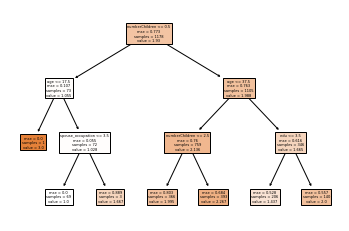

In [30]:
#3.3 
# Train a regression tree
regressor = tree.DecisionTreeRegressor(random_state=42, max_depth=3)
regressor = regressor.fit(X_train, y_train)
# Visualize results:
tree.plot_tree(regressor,filled=True,feature_names=X_train.columns, class_names=["Method 1", "Method 2", "Method 3"]) 

# What values do they take? Does that make sense? Explain clearly what has gone wrong here.
# When using a regression tree on categorical data like the contraceptive method choice, the tree tries to predict a continuous value, which doesn't make sense for categories. The terminal nodes in the tree show values like 1.0, 2.0, and 3.0, which correspond to the categories of contraceptive methods.However, these values should not be interpreted as averages or continuous numbers, as they are actually categories. Aka the regression tree is treating the categorical data as if it were numerical data which is wrong. 

[Text(472.15384615384613, 475.65000000000003, 'numberChildren <= 0.5\ngini = 0.646\nsamples = 1178\nvalue = [499, 262, 417]\nclass = Method 1'),
 Text(171.69230769230768, 339.75, 'age <= 17.5\ngini = 0.053\nsamples = 73\nvalue = [71, 0, 2]\nclass = Method 1'),
 Text(85.84615384615384, 203.85000000000002, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Method 3'),
 Text(257.53846153846155, 203.85000000000002, 'spouse_occupation <= 3.5\ngini = 0.027\nsamples = 72\nvalue = [71, 0, 1]\nclass = Method 1'),
 Text(171.69230769230768, 67.94999999999999, 'gini = 0.0\nsamples = 69\nvalue = [69, 0, 0]\nclass = Method 1'),
 Text(343.38461538461536, 67.94999999999999, 'gini = 0.444\nsamples = 3\nvalue = [2, 0, 1]\nclass = Method 1'),
 Text(772.6153846153845, 339.75, 'age <= 37.5\ngini = 0.653\nsamples = 1105\nvalue = [428, 262, 415]\nclass = Method 1'),
 Text(600.9230769230769, 203.85000000000002, 'edu <= 2.5\ngini = 0.639\nsamples = 759\nvalue = [244, 168, 347]\nclass = Method 3'),
 Text(515.

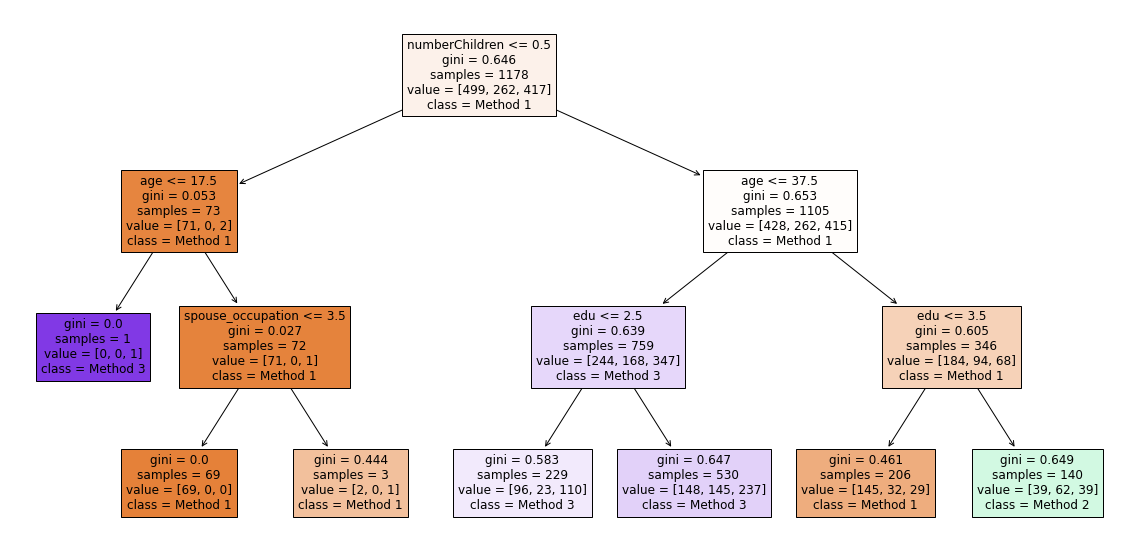

In [74]:
#3.4 
# Train a classification tree
classifier = tree.DecisionTreeClassifier(random_state=42, max_depth=3)
classifier.fit(X_train, y_train)

# Predictions from the classification tree
y_pred=classifier.predict(X_test)

# Visualize results:
plt.figure(figsize=(20,10))
tree.plot_tree(classifier ,filled=True,feature_names=X_train.columns, class_names=["Method 1", "Method 2", "Method 3"]) 


# How does it look different from the previous tree?
# Unlike the regression tree, the classification tree uses the Gini impurity measure (not mean squared error) and predicts categories directly, not continuous values.
# What variables does the algorithm use?
# Both trees split data based on features, but the classification tree does this to sort data into categories (like types of contraception) rather than find average values.
# In broad terms, which groups of people are most likely to use each method of contraception?
# No Contraception (Method 1): Preferred by very young individuals with very few children and by older individuals with a less education. Long-term Contraception (Method 2): More popular among older individuals with higher education levels and less then 2 childern.Short-term Contraception (Method 3): used by younger to middle-aged individuals with moderate to higher education levels.

In [76]:
3.5
tab = pd.crosstab(y_test,y_pred)  # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0])  # Compute Accuracy
print('Accuracy: ', acc, '\n')
print(pd.crosstab(y_test,y_pred))

# Assuming y_test contains the true labels and y_pred contains the predicted labels for contraceptive methods
method_1_correct = tab.iloc[0, 0]
method_1_total = tab.iloc[0, :].sum()

method_2_correct = tab.iloc[1, 1]
method_2_total = tab.iloc[1, :].sum()

method_3_correct = tab.iloc[2, 2]
method_3_total = tab.iloc[2, :].sum()

accuracy_method_1 = method_1_correct / method_1_total
accuracy_method_2 = method_2_correct / method_2_total
accuracy_method_3 = method_3_correct / method_3_total
accuracy_method_1, accuracy_method_2, accuracy_method_3


#Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
#The overall accuracy of the model is approximately 83.54%. No Contraception (Method 1): approximately 36.15% accuracy, Long-term Contraception (Method 2): approximately 26.76% accuracy, and Short-term Contraception (Method 3): approximately 92.55% accuracy.



Accuracy:  0.8354430379746836 

col_0    1   2   3
method            
1       47  10  73
2        3  19  49
3        4   3  87


(0.36153846153846153, 0.2676056338028169, 0.925531914893617)

In [ ]:
#3.6
#Why can't you use a linear probability model to do this exercise? Explain clearly in words.
#The linear probability model isn't right for this exercise because it's designed only for binary outcomes (yes/no or 0/1 type responses). When dealing with more than two categories, like in this case with contraceptive methods, this model can predictions that don't make sense like probabilities outside the 0-1 range. It also assumes that each predictor's impact (like age and education) is the same across all probability levels when chosing contraceptive methods, which is not true. In simple terms, the linear model is not made for situations where there are more than two options to choose from.

**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent 
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where 
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?